<a href="https://colab.research.google.com/github/Madrinmarison/Deep_Learning/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks and Computer Vision with Tensorflow**

Computer vision is an art of writing computer aligorithms that can discover patterns in visual data (image). An exmaple of Computer vision application is rcognizing cars infront of a self driving car through images take by the car's camera.

> ### **What this notebook covers**
- *Getting a dataset to work with (pizza_steak 🍕🥩)*
- *Architecture of a convolutional neural network (CNN) with TensorFlow*
- *An end-to-end binary image classification problem*
- *Steps in modelling with CNN*
 - *Creating CNN, compiling a model, fitting a model, evaluating a model*
- *An end-to-end multi-class image classification problem*
- *Making predictions on own custom images*


> Fully - Connected ANN takes flattened data...
CNN2D takes 2D data...

# Get the data
The images we are working with are from the [Food101](https://www.kaggle.com/datasets/dansbecker/food-101) dataset (101 different classes of food).

However, we have modified it to use only two classes, (Pizza 🍕, and Steak 🥩), using data [modification notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb):

> 🔑 **Note:** We start with a small dataset so we can experiment quickly and figure what works (or better yet what does not work) before scalling up.



>Give discription of an data from it's own knowledge and exploratory -->
Model to explore online, learn everything from online ---> become a guide to external world ---> "Not yet, I'll figure myself out - intelligent than any human"---> Model that knows everything---> describe events ---> Get knowledge from online sources ---> Once it has explored alot about a specific field ---> Store its knowldge---> update time to time ---> Explore ---> Upgdare ---> Exploit keept knowledge as you upgrade ---> ge from trusted sources...
Combine computer Vision with the NLP

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
# Unizip downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-10-12 09:51:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  58.1MB/s    in 1.8s    

2022-10-12 09:51:45 (58.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with the data)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer Vision project... this means visualizing as many sample of your data as possible.

In [ ]:
# check what our data cointains
!ls pizza_steak

test  train


There two major directories in our dataset

In [ ]:
!ls pizza_steak/train

pizza  steak


Train data holds two directories as well, one for the pizza images and the other one for the steak.

In [ ]:
# List steak images
!ls pizza_steak/train/steak

In [ ]:
# How many images are they
import os

# Walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and '{len(filenames)}' images in {dirpath}.")

There are 2 directories and '0' images in pizza_steak.
There are 2 directories and '0' images in pizza_steak/test.
There are 0 directories and '250' images in pizza_steak/test/steak.
There are 0 directories and '250' images in pizza_steak/test/pizza.
There are 2 directories and '0' images in pizza_steak/train.
There are 0 directories and '750' images in pizza_steak/train/steak.
There are 0 directories and '750' images in pizza_steak/train/pizza.


In [ ]:
# Another way to find how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our imges, first let's get the class name programmatically.

In [ ]:
# Get the classnames from using the directory path
import pathlib

import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
# Creat a list of names from subdirectories (sub directories in training folder)
class_names = sorted([item.name for item in data_dir.glob("*")])
print(class_names)

['pizza', 'steak']


In [ ]:
import pathib
data_dir = pathlib.Path("pizza_steak/train")
class_names = sorted([item.name for item in data_dir.glob('*')])

['pizza', 'steak']

There two classes in our dataset, `pizza` and `steak`.

### **Visualize Images randoms from two classes simultaneously**

In [ ]:
target_class = random.sample(class_names, 1)
target_class

['pizza']

In [ ]:
# Visualizing images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Set the target directory (we view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.figure(figsize = (7,7))
    plt.imshow(img)
    font1 = {'family':'serif','color':'m','size':17}
    plt.title(f"|{target_class.capitalize()}|", fontdict=font1, loc = 'left')
    plt.axis("off");

    # print(f"Image shape: {img.shape}") # show image shape
    return img


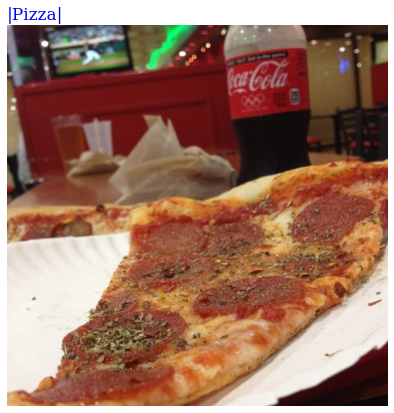

In [ ]:
 # View random image from the training dataset (who to plot with while?)
 target_class = random.choice(sorted([item.name for item in data_dir.glob("*")]))
 img = view_random_image(target_dir = "pizza_steak/train/",
                         target_class=target_class)

In [ ]:
import tensorflow as tf

# set the number of characters per row when printing
np.set_printoptions(linewidth = 400)
tf.constant(img)

array([[[232, 189, 120],
        [222, 179, 111],
        [225, 182, 114],
        ...,
        [241, 244, 237],
        [242, 245, 238],
        [241, 244, 237]],

       [[221, 178, 110],
        [216, 173, 105],
        [222, 178, 113],
        ...,
        [239, 242, 235],
        [241, 244, 237],
        [241, 244, 237]],

       [[218, 173, 108],
        [217, 172, 107],
        [226, 180, 118],
        ...,
        [239, 242, 235],
        [240, 243, 236],
        [238, 241, 234]],

       ...,

       [[238, 188, 125],
        [227, 176, 113],
        [216, 165, 102],
        ...,
        [ 58,  56,  57],
        [ 58,  56,  57],
        [ 57,  55,  56]],

       [[240, 192, 120],
        [234, 186, 114],
        [221, 172, 103],
        ...,
        [ 60,  58,  59],
        [ 62,  60,  61],
        [ 62,  60,  61]],

       [[235, 188, 106],
        [235, 188, 108],
        [224, 176, 100],
        ...,
        [ 58,  56,  57],
        [ 60,  59,  57],
        [ 61,  60,  58]]

In [ ]:
# View the image shape
img.shape # returns width, height and color channels

(512, 512, 3)

🔑 **Note:** Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing step for working with image is to **rescale** (also referred as normalize) their pixel values by diving the image by 255. (Since 255 is the maximum pixel value for any image).

In [ ]:
# Get all pixel values between 0 & 1
img / 255.

array([[[0.11764706, 0.13333333, 0.12941176],
        [0.11764706, 0.13333333, 0.12941176],
        [0.11372549, 0.12941176, 0.1254902 ],
        ...,
        [0.08627451, 0.05490196, 0.00392157],
        [0.09019608, 0.05882353, 0.00784314],
        [0.09019608, 0.05882353, 0.00784314]],

       [[0.10588235, 0.12156863, 0.11764706],
        [0.10588235, 0.12156863, 0.11764706],
        [0.10588235, 0.12156863, 0.11764706],
        ...,
        [0.08235294, 0.05098039, 0.00784314],
        [0.08627451, 0.05490196, 0.00392157],
        [0.07843137, 0.04705882, 0.        ]],

       [[0.09411765, 0.10980392, 0.11372549],
        [0.09411765, 0.10980392, 0.11372549],
        [0.09803922, 0.11372549, 0.11764706],
        ...,
        [0.09803922, 0.06666667, 0.02352941],
        [0.09803922, 0.06666667, 0.01568627],
        [0.08627451, 0.05490196, 0.00392157]],

       ...,

       [[0.30196078, 0.32156863, 0.29411765],
        [0.33333333, 0.35686275, 0.31764706],
        [0.37254902, 0

## **An end-to-end Example**

Build a convolutional neural network to find patterns in our images, more specifically we need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data
>   * Evaluate our CNN model
    * Make prediction
    * Visualize prediction (with their correct labels and model prediction label associated with the prediction confidence)
    * Run experiments to improve its results
    * Compare performance metrics of various models and save the best performing model
    * Plot the Confusion matrix of the best performing model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess the data (get all pxel values between 0 & 1 also called scalling/normlization)
train_datagen = ImageDataGenerator(rescale = 1. / 255.)
valid_datagen = ImageDataGenerator(rescale = 1. / 255.)

# Set paths to ur data directories (Both the training and the test data)
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)



valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224, 224),
                                               class_mode ="binary",
                                               seed = 42)


# Build a CNN model(same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tfl.Conv2D(filters = 10,
               kernel_size = 3,
               activation = "relu",
               input_shape = (224, 224, 3)),
    tfl.Conv2D(10, 3, activation = "relu"),
    tfl.MaxPool2D(pool_size = 2,
                  padding = "valid"),
    tfl.Conv2D(10, 3, activation = "relu"), # run to lConv@D layers before applying MaxPooling
    tfl.Conv2D(10, 3, activation = "relu"),
    tfl.MaxPool2D(2),
    tfl.Flatten(),
    tfl.Dense(1, "sigmoid")

])

# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 206ms/step - loss: 0.6052 - accuracy: 0.6613 - val_loss: 0.4421 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.4385 - accuracy: 0.8033 - val_loss: 0.3747 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3911 - accuracy: 0.8327 - val_loss: 0.3384 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3597 - accuracy: 0.8533 - val_loss: 0.3037 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3216 - accuracy: 0.8773 - val_loss: 0.3483 - val_accuracy: 0.8380


First epoch usually takes longer than the subsequent epochs as first the data has to be uploaded to the memory in this epoch.

> 🔑 **Note:** If the above cell is taking long than ~10 seconds per epochs, make sure you're using a GPU by going to:

Runtime --> Change Runtime Type --> Hardware Accelator --> GPU (you may have to rerun some cells above)

In [ ]:
# Epoch 1/5
# 47/47 [==============================] - 114s 2s/step - loss: 0.5571 - accuracy: 0.7087 - val_loss: 0.4312 - val_accuracy: 0.8000

In [ ]:
# Get model sumary
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🛠 **Practice:** Go throught the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for a minimum of 10 minutes and compare our neural network with theirs:

### **Trying a non-CNN model on our image data**

Let's replicate the model we build before to see if it works with our imge data.

The model we are building is from [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.91239&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false):

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Fit the model
history_2 =  model_2.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 1.2550 - accuracy: 0.4913 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x parameters than CNN(model_1), model_2 performs terribly bad... let's try improving it.

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

# Fit the model
history_3 =  model_3.fit(train_data,
                         epochs = 5,
                         steps_per_epoch = len(train_data),
                         validation_data = valid_data,
                         validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 3.4519 - accuracy: 0.6147 - val_loss: 1.0350 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.8597 - accuracy: 0.7100 - val_loss: 0.7077 - val_accuracy: 0.6320
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5880 - accuracy: 0.7267 - val_loss: 0.4659 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5176 - accuracy: 0.7593 - val_loss: 0.4543 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4734 - accuracy: 0.7747 - val_loss: 0.4993 - val_accuracy: 0.7480


In [ ]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from the data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the different style of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important pattrerns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more useful in dechipering different features in an image.

In [ ]:
# Why Convolutional neural networks works better with less complexity than the Fully-Connected Neural networks.
1. Paramater sharing: Kernel used to learn a particular orientitions, i.e., verticle lines is used in different parts of an image.
2. Sparse...

## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visaulize)
2. Preprocess the data (prepare it for our model, nain step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat the baseline model)
7. Reapt until satsfied(experiment, experiment, experiment)

### 1. Become one with the data

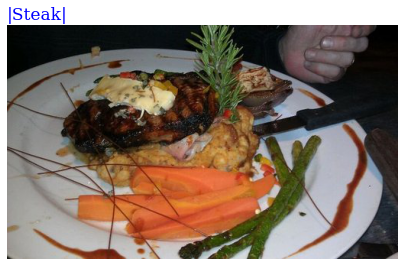

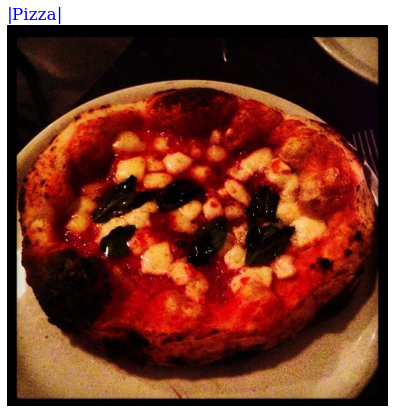

In [ ]:
steak_img = view_random_image("pizza_steak/train/", "steak")
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for the model)


In [ ]:
# Define directory data paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn or data into **batches**.

A batch is a small subset of a data. Rather than looking at all ~10,000 images at same time, a model might only look at 32 at a time,

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into  the memory of your processor (GPU).
2. Try to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?

- Because 32 is [good for your health](https://twitter.com/ylecun/status/989610208497360896?lang=en)...

In [ ]:
!nvidia-smi

Fri Sep  2 19:13:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    33W /  70W |   2348MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test data Generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

In [ ]:
# Load in our image data from directories and turn them into image batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory of images
                                               target_size = (224, 224), # Target size of images (height, width)
                                               class_mode = "binary", # type of data you're working with
                                               batch_size = 32) # size of minibatches to load the data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)
                                              

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of a train data
images, labels = train_data.next() # get the next batch of images/labels in tarin data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.427451  , 0.24313727, 0.07058824],
          [0.4156863 , 0.24313727, 0.06666667],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.47450984, 0.28235295, 0.12156864],
          [0.48235297, 0.2901961 , 0.12941177],
          [0.48235297, 0.2901961 , 0.12941177]],
 
         [[0.40000004, 0.21568629, 0.04313726],
          [0.4039216 , 0.23137257, 0.05490196],
          [0.427451  , 0.25490198, 0.07843138],
          ...,
          [0.46274513, 0.27058825, 0.10980393],
          [0.46274513, 0.27058825, 0.10980393],
          [0.4666667 , 0.27450982, 0.1137255 ]],
 
         [[0.41176474, 0.227451  , 0.05490196],
          [0.39607847, 0.22352943, 0.04705883],
          [0.39607847, 0.22352943, 0.04705883],
          ...,
          [0.43921572, 0.24705884, 0.08627451],
          [0.45882356, 0.26666668, 0.10588236],
          [0.46274513, 0.27058825, 0.10980393]],
 
         ...,
 
         [[0.38431376, 0.34901962, 0.3137255 ],
          [0.40392

In [ ]:
# View the first batch of labels
labels

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.], dtype=float32)

### 3. Create CNN Model (start with a baseline)
A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and as you keep experimenting you try to beat the its results.

> 🔑 **Note:** In deep learning there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data, if it doesn't, then introduce complexity ( e.g. look at which model is performing best in the field for your problem).

In [ ]:
# Making creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential



In [ ]:
# Create the model (this will be our baseline, a three layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters = 10, # numbers of sliding widows going across an input (higher = more complex model)
           kernel_size = (3, 3), # the size of a sliding widow going through an input
           strides = (1, 1), # the size of the step the sliding widow takes across an input
           padding = "valid", # if "same", output shape==input shape, if "valid", output shape gets compressed
           activation = "relu",
           input_shape = (224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    Flatten(),
    Dense(1, activation = "sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

🛠 **Practice:** Understand what's going on in a Conv2D layer by goining through the CNN explainer website for 10 - 20 minutes:

In [ ]:
# Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Get model summary
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the lengths of training and test data generators


In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # combination of labels and sample data
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data =test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 197ms/step - loss: 0.9942 - accuracy: 0.6993 - val_loss: 0.4146 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4029 - accuracy: 0.8280 - val_loss: 0.3965 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3072 - accuracy: 0.8793 - val_loss: 0.3483 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1938 - accuracy: 0.9320 - val_loss: 0.3797 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.0766 - accuracy: 0.9827 - val_loss: 0.3779 - val_accuracy: 0.8420


## Evaluating our model

It looks like our model is learning something, let's evaluate it.

In [ ]:
# Returns dictionary
history_4.history

In [ ]:
# make dataframe of the above dictionary
import pandas as pd
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.994227,0.699333,0.414618,0.828
1,0.402910,0.828000,0.396523,0.826
2,0.307214,0.879333,0.348262,0.856
3,0.193814,0.932000,0.379692,0.856
4,0.076559,0.982667,0.377904,0.842


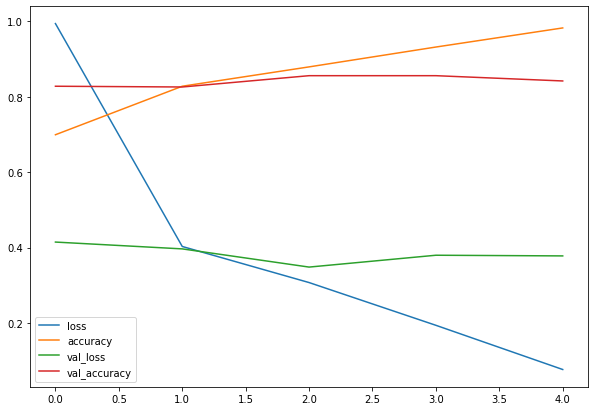

In [ ]:
# lets plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10, 7))

In [ ]:
# plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for

  # plot loss
  plt.plot(epochs, loss, label = "training loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend();

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy,  label = "Val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is overfitting the training dataset. This means it's learning the patterns in the training data **too well** and thus the model's ability to generalize to unseen data will be diminished.

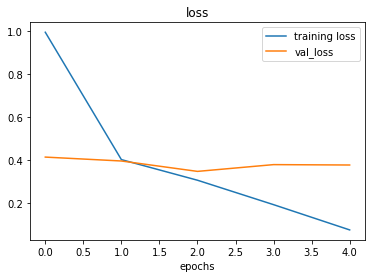

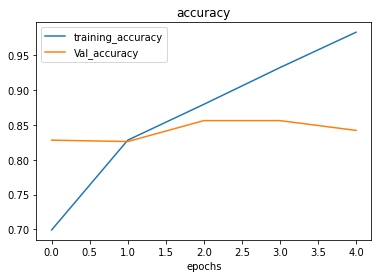

In [ ]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 135ms/step - loss: 0.3779 - accuracy: 0.8420


[0.3779037594795227, 0.8420000076293945]

If the training curves are decreasing and the validation set increasing it means that the model is overfitting. That's the model is learningthe training data too well but unable to generalize to unseen data.

### 6. Adjust the model parameters
Fitting the machine learning model comes three steps:
0. Create a baseline
1. Beat the base line by overfitting a larger model
2. Reduce overfitting

Ways to reduce overfitting:
* Increase the number on Conv layers
* Increase the number of Conv filters
* Add another dense layer to the output of our flattened layer.

Ways to reduce overfitting:
* Add data augumentation
* Add regularization layers (MaxPool2D)
* Add more data

> 🔑 **Note:** Reducing overfitting is also known as regularization.

In [ ]:
# create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

Max Pulling layer takes the most important features.

In [ ]:
# compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6087 - accuracy: 0.6713 - val_loss: 0.5194 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4772 - accuracy: 0.7767 - val_loss: 0.4337 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4496 - accuracy: 0.7993 - val_loss: 0.3795 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4187 - accuracy: 0.8200 - val_loss: 0.3688 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.3976 - accuracy: 0.8273 - val_loss: 0.3817 - val_accuracy: 0.8400


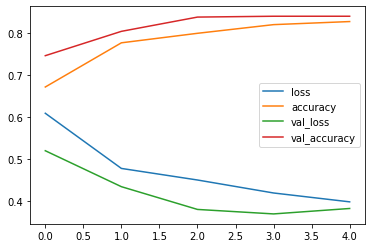

In [ ]:
pd.DataFrame(history_5.history).plot();

In [ ]:
# Model_5 summary
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [ ]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_1 (Flatten)         (None, 475240)            0         
                                                                 
 dense_1 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


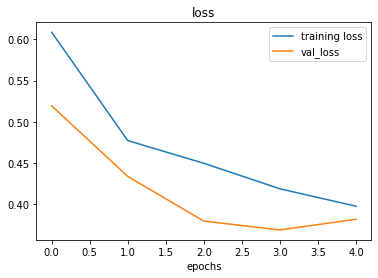

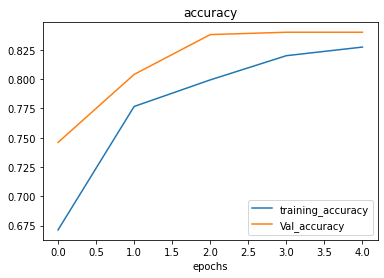

In [ ]:
# plot loss curves
plot_loss_curves(history_5)

# *Reducing overfitting with data augmentation*

In [ ]:
#Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale = 1.0/255.,
                                             rotation_range = 0.2 ,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1. / 255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale = 1/ 255.)

> 🤔 **Quesition:** What is data augmentation?

Data augmentation is the process of altering the training data, leadin to have diversity and inturn allowing our model learn more generalizable, hopefully, patterns.

Altering might mean adjusting the rotation of an image, flipping it, cropping it, shearing it or something similar.

Let's write some code to visualize data agumention.

In [ ]:
# import dat and augment it from the training directory
print("Agumented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size = (224, 224),
                                                         batch_size = 32,
                                                         class_mode = "binary",
                                                         shuffle = False) # for demonistration purposes only


# Create non-augmented train data batches
print("\n Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               shuffle = False)

IMG_SIZE = (224, 224) # global variable
# Create the non-augmented test data batche
print("\n Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = "binary")

Agumented training data:
Found 1500 images belonging to 2 classes.

 Non-augmented training data:
Found 1500 images belonging to 2 classes.

 Non-augmented test data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is only performed on the traing data. Using `ImageDataGenerator` built-in data augmentation parameters, our images are left as they are in the directories but are modeified as they are loaded into the model. We normally hope that if model can perform best on the augumeted training data then it is likely to perform best in the testing data. We evaluate this.

Finally... let's visualize some augmented data!!!

In [ ]:
random_number = random.randint(0, 32) # for range
random_number

random_number = random.choice(np.arange(32)) # for an array
random_number

In [ ]:
# Get sample data batches
images, label = train_data.next() # get the first batch using next 
augumented_images, augumeted_labels = train_data_augmented.next() # labels are not augmented, only data (image) / get the first batch of afumented data

showing image number: 31


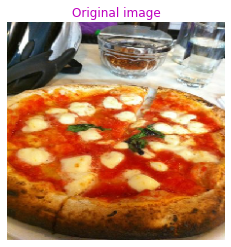

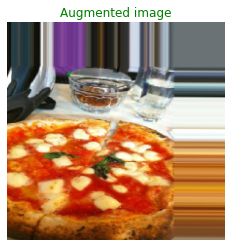

In [ ]:
# show the original image and augmented image
import random
random_number = random.randint(0, 32) # our batch are 32..
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image", c = "m")
plt.axis(False)
plt.figure()
plt.imshow(augumented_images[random_number])
plt.title(f"Augmented image", c="g")
plt.axis(False);

Now we have seen how the augmented data looks like, let's build a model and see how it learns.

In [ ]:
# Create a model with the agumented data
model_6 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model_6 on augumeted data
history_6_agumented = model_6.fit(train_data_augmented,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data_augmented),
                                  validation_data = test_data,
                                  validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 460ms/step - loss: 0.7087 - accuracy: 0.4933 - val_loss: 0.6785 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6834 - accuracy: 0.6287 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 22s 467ms/step - loss: 0.6827 - accuracy: 0.5760 - val_loss: 0.6619 - val_accuracy: 0.5760
Epoch 4/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6627 - accuracy: 0.6367 - val_loss: 0.6187 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 21s 453ms/step - loss: 0.6360 - accuracy: 0.6507 - val_loss: 0.5509 - val_accuracy: 0.7680


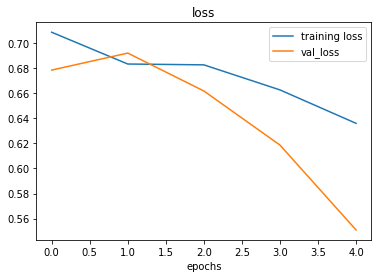

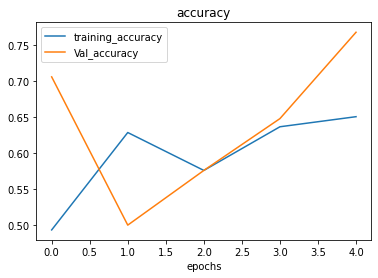

In [ ]:
# check our models training curves
plot_loss_curves(history_6_agumented)

In [ ]:
# Use un-augumented data
history_6 = model_6.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6588 - accuracy: 0.5840 - val_loss: 0.5566 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.5472 - accuracy: 0.7480 - val_loss: 0.4180 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4746 - accuracy: 0.7733 - val_loss: 0.3697 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4490 - accuracy: 0.7980 - val_loss: 0.4231 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4524 - accuracy: 0.7967 - val_loss: 0.4156 - val_accuracy: 0.8380


Model took longer to train.... Since the augumeted data is created as the model process and not at the in the original directrory. This may take some extra computational power on the flight.

The results are also not so interesting, remember we didn't shuffle our data, let's try this.

Let's shuffle our augmented train data and train another model (the same as before) on it and see what happens)


In [ ]:
print("Agumented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size = (224, 224),
                                                         batch_size = 32,
                                                         class_mode = "binary")


# Create non-augmented train data batches
print("\n Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "binary")

IMG_SIZE = (224, 224) # global variable
# Create the non-augmented test data batche
print("\n Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SIZE,
                                             batch_size = 32,
                                             class_mode = "binary")

# Create a model with the agumented data
model_7 = Sequential([
    Conv2D(10, 3, activation = "relu", input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = "sigmoid")
])

# Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model_6 on augumeted data
history_7 = model_7.fit(train_data_augmented,
                                  epochs = 5,
                                  steps_per_epoch = len(train_data_augmented),
                                  validation_data = test_data,
                                  validation_steps = len(test_data))

Agumented training data:
Found 1500 images belonging to 2 classes.

 Non-augmented training data:
Found 1500 images belonging to 2 classes.

 Non-augmented test data:
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 454ms/step - loss: 0.6567 - accuracy: 0.5727 - val_loss: 0.5978 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6040 - accuracy: 0.6813 - val_loss: 0.5097 - val_accuracy: 0.7160
Epoch 3/5
47/47 [==============================] - 21s 452ms/step - loss: 0.5551 - accuracy: 0.7313 - val_loss: 0.5320 - val_accuracy: 0.6900
Epoch 4/5
47/47 [==============================] - 21s 452ms/step - loss: 0.5213 - accuracy: 0.7400 - val_loss: 0.4203 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 21s 453ms/step - loss: 0.4917 - accuracy: 0.7573 - val_loss: 0.3632 - val_accuracy: 0.8600


Accuracy increased after shuffling the data. This is the power of shuffling the data.

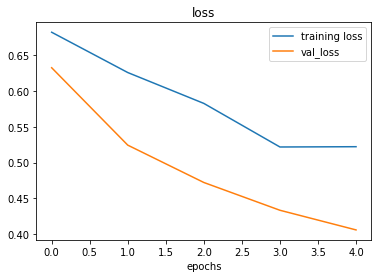

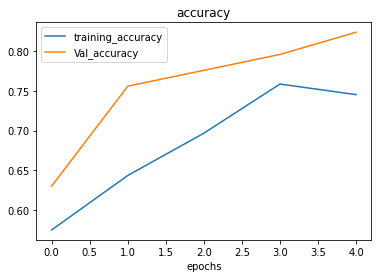

In [ ]:
plot_loss_curves(history_7)

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### Repeat until satisfied.
Since we've already beaten our baseline, there are a few things we could do to continue to improve our model.

* Increase the number of model layers ( e.g. add more `Conv2D, MaxPool2D.
* Increase the number of filters in each convolutional layer (e.g. frm 10 to 32 or even 64)
* Train for longer (more epochs) - We can keep the structure the same and train for longer.
* Find ideal learning rate using callbacks.
* Get more data (give the model more opportunity to learn).
* Use **transfer learning** to leverage what another model has learn and adjust it for our own use case.

> 🛠 **To Practice:** Recreate the model on the CNN explainer website (same as model_1) and see how it performs on the shuffled data.


# Making a prediction with our trained model on our own custom data.

In [ ]:
# classes we are working with
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2022-10-12 12:58:53--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.007s  

2022-10-12 12:58:53 (252 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



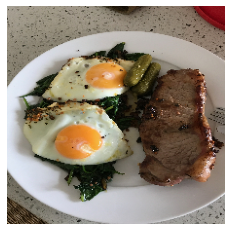

In [ ]:
plt.imshow(steak)
plt.axis(False);

In [ ]:
# check the shape of our image data
steak.shape

TensorShape([224, 224, 3])

> 🔑 **Note:** When you train a neural network and you want to make prediction with it on your own custom daya, it's important to ensure your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

# Create a helper function to load and preprocess our image data

Here we will create an helper function to import and resize an image to be able to be used with our model.  

In [ ]:
def load_and_prep_image(filename, target_shape = 224):
    """ 
    Reads an image from filename , turns it into tensor a tensor and
    reshapes it to (img_shape, imag_shape, colour channel)
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_jpeg(img)
    # Resize the image
    img = tf.image.resize(img, size = [target_shape, target_shape])
    # Rescale the image
    img = img/ 255.0
    return img

In [ ]:
# load in and preprocess our image
steak = load_and_prep_image("03-steak.jpeg")

In [ ]:
prediction = model_7.predict(tf.expand_dims(steak, axis =0 ))
prediction

array([[0.91424596]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability,

wouldn't it be nice if we could visualize image as well as the model's prediction?

In [ ]:
# Remind ourselves of the class names
class_names

['pizza', 'steak']

In [ ]:
# introduce integer
int(tf.round(prediction))

1

In [ ]:
# get predicted class
pred_class = class_names[int(tf.round(prediction))]
print(pred_class)

steak


In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
    """
    Import an image located at filename, makes a prediction with the model 
    and plots the image wit the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # plot the image and the predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class.capitalize()}")
    plt.axis(False);

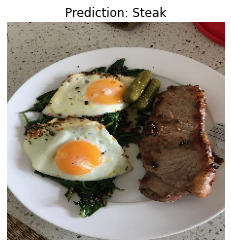

In [ ]:
# Test our model on the custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image... this time pizza 🍕

In [ ]:
# Download another test custom image and make a prediction on it (download any random free image online and make prediction on)
!wget https://cdn.pixabay.com/photo/2017/12/10/14/47/pizza-3010062_960_720.jpg

--2022-10-12 13:08:09--  https://cdn.pixabay.com/photo/2017/12/10/14/47/pizza-3010062_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.150.12, 104.18.37.244, 2606:4700:4400::6812:25f4, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.150.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188205 (184K) [binary/octet-stream]
Saving to: ‘pizza-3010062_960_720.jpg’

pizza-3010062_960_7 100%[===================>] 183.79K  --.-KB/s    in 0.004s  

2022-10-12 13:08:09 (47.1 MB/s) - ‘pizza-3010062_960_720.jpg’ saved [188205/188205]



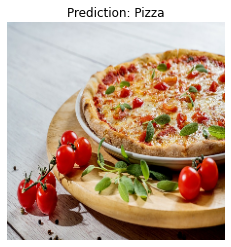

In [ ]:
pred_and_plot(model_7, "pizza-3010062_960_720.jpg")

Our model makes the rigth prediction

> "Change the image into jpg format"

In [ ]:
# download another steak image and let our model make prediction
!wget https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1000w,f_auto,q_auto:best/newscms/2018_39/1370640/elizabeth-heiskell-food-today-main-180925-04.jpg

--2022-10-12 13:12:13--  https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1000w,f_auto,q_auto:best/newscms/2018_39/1370640/elizabeth-heiskell-food-today-main-180925-04.jpg
Resolving media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)... 104.69.157.204, 2600:1413:b000:384::a1d, 2600:1413:b000:399::a1d
Connecting to media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)|104.69.157.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188736 (184K) [image/jpeg]
Saving to: ‘elizabeth-heiskell-food-today-main-180925-04.jpg’

elizabeth-heiskell- 100%[===================>] 184.31K  --.-KB/s    in 0.06s   

2022-10-12 13:12:14 (3.05 MB/s) - ‘elizabeth-heiskell-food-today-main-180925-04.jpg’ saved [188736/188736]



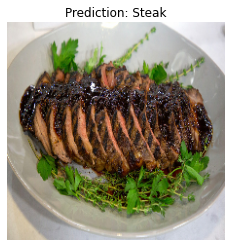

In [ ]:
pred_and_plot(model_7, "elizabeth-heiskell-food-today-main-180925-04.jpg")

We have build an end-to-end binary image classification task model. Now it's time to build an end to end multi-class image classification model.

# **Multi-class Image classification**

We've just been through a bunch of the following steps with a binary classification problem (pizza vs steak), now we're going to step things up a notch with ten classes of food (multi-class classification)

**Steps we will got through:**

1. Become one with the data.
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (Overfit it to make sure it works - Overfitting is a good thing as it means our model is learning something and we can later take care of it.)
5. Evaluate the model
6. Adjust different hyperprameters and improve the model (try to beat the baseline/ reduce overfitting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-10-12 13:15:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  78.4MB/s    in 6.7s    

2022-10-12 13:16:03 (73.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [ ]:
# Set up train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir) # turn the data path directory into python object
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger' 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


### Explore the data
Visualize, Visualize, Visualize.

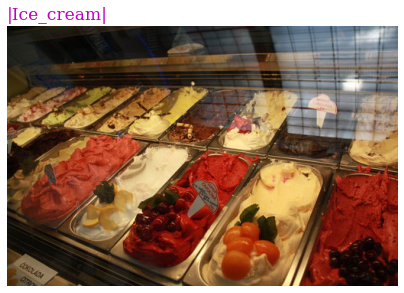

In [ ]:
# Visualize random image
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

## 2. Prerocess the data (prepare data for the model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale = 1 / 255.)
test_datagen = ImageDataGenerator(rescale = 1 /255.)

IMG_SIZE = (224, 224)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMG_SIZE,
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size = IMG_SIZE,
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Data is already in tensorflow performant format:

## 3. Create a model(start with baseline)
We've been talking a lot about CNN Explainer website... how about we take their model (also on 10 classes) and use it in our problem...

In [ ]:
# import dependencies
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(10, 3, input_shape = (224,224,3) ),
    Activation( activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")# changed to have 10 output neurons and use the softmax activation
])

# compile the model
model_8.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 4. Fit ta model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 55s 233ms/step - loss: 2.1392 - accuracy: 0.2181 - val_loss: 1.9962 - val_accuracy: 0.2736
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.8743 - accuracy: 0.3551 - val_loss: 1.8873 - val_accuracy: 0.3396
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 1.5180 - accuracy: 0.4939 - val_loss: 1.9762 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 0.9237 - accuracy: 0.6991 - val_loss: 2.4097 - val_accuracy: 0.3040
Epoch 5/5
235/235 [==============================] - 44s 186ms/step - loss: 0.3834 - accuracy: 0.8804 - val_loss: 3.2974 - val_accuracy: 0.2812


If our model was guessing, val_accuracy would be 10. But here it's doing better than just guessing.

### 5. Evaluate the model

In [ ]:
# Evaluate on our test data
model_8.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 3.2974 - accuracy: 0.2812


[3.297438621520996, 0.28119999170303345]

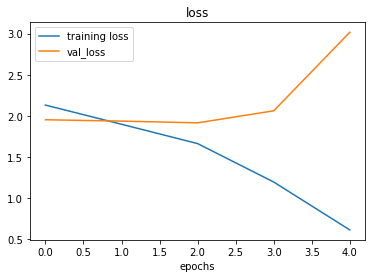

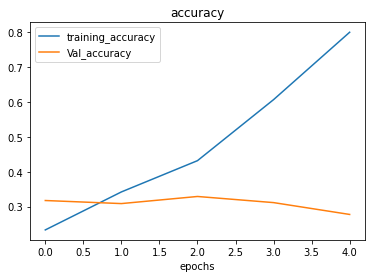

In [ ]:
# Check the model lose curves
plot_loss_curves(history_8)

What do these lose curves tell us?

Well... it seems our model is overfitting the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data thus performing poorly on the test  dataset.

### 6. Adjust model hyperparemeters (to beat baseline/reduce overfitting)

Due to its performance on the training data, it's clear that our model is learning something...

However, it's not generalizing well to unseen data (overfitting)

So, let's try and fix overfitting by...
* **Get More Data** - having more data gives the model more opportunity  to learn diverse patterns...

* **Simplify the model** - if our current model is overfitting the data, it may be too complicated for the data, one way to simplify the model is to reduce the number of layers or number of hidden units in layers.

* **Use data augmentation** - data augmentation manipulates the training data in such a way to add diversity to it (without altering the original data).
* **Use transfer learning** - Transfer learning laverage the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [ ]:
# How about we try and simplify our current model first
# lets try to remove 2 convolutional layers...

model_9 = Sequential([
    Conv2D(10, 3, input_shape = (224,224, 3) ),
    Activation( activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "softmax")# changed to have 10 output neurons and use the softmax activation
])

# compile the model
model_9.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = test_data,
            validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 43s 181ms/step - loss: 2.2431 - accuracy: 0.2273 - val_loss: 1.9776 - val_accuracy: 0.3056
Epoch 2/5
235/235 [==============================] - 42s 181ms/step - loss: 1.7472 - accuracy: 0.4169 - val_loss: 1.9101 - val_accuracy: 0.3352
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.3881 - accuracy: 0.5509 - val_loss: 2.0043 - val_accuracy: 0.3176
Epoch 4/5
235/235 [==============================] - 42s 181ms/step - loss: 0.9854 - accuracy: 0.6991 - val_loss: 2.3012 - val_accuracy: 0.2968
Epoch 5/5
235/235 [==============================] - 42s 180ms/step - loss: 0.5947 - accuracy: 0.8331 - val_loss: 2.7004 - val_accuracy: 0.2760


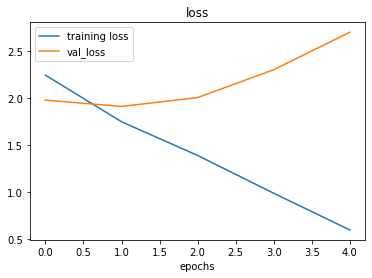

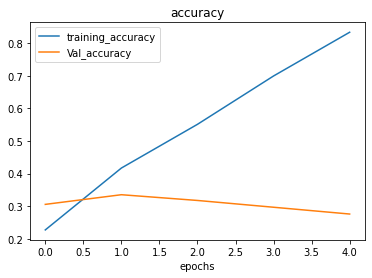

In [ ]:
# check out loss curves of model_9
plot_loss_curves(history_9)

In [ ]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_2 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)            

In [ ]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_26 (Conv2D)          (None, 106, 106, 10)      910       
                                                      

Looks like our "simplified the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation.??

After reducing the number of convolution layers the number of parameters shot up. 

## Trying reducing overfittingwit with data augmentation

Let's try and improve our model performance using augmented data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve the validation accuracy

In [ ]:
# Create the Augumented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1.0/255.,
                                             rotation_range = 0.2 ,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Make another model but this time we will fit it on the augmented data of 10 classes
model_10 = tf.keras.models.clone_model(model_8) # clones the archtecture
# Compile the model(using same set up as the previuos model)
model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs = 5,
                          steps_per_epoch = len(train_data_augmented),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 109s 460ms/step - loss: 2.3050 - accuracy: 0.0933 - val_loss: 2.3025 - val_accuracy: 0.1060
Epoch 2/5
235/235 [==============================] - 107s 456ms/step - loss: 2.2893 - accuracy: 0.1188 - val_loss: 2.2252 - val_accuracy: 0.1716
Epoch 3/5
235/235 [==============================] - 108s 458ms/step - loss: 2.2440 - accuracy: 0.1625 - val_loss: 2.2130 - val_accuracy: 0.1888
Epoch 4/5
235/235 [==============================] - 107s 455ms/step - loss: 2.2175 - accuracy: 0.1768 - val_loss: 2.1299 - val_accuracy: 0.2120
Epoch 5/5
235/235 [==============================] - 106s 453ms/step - loss: 2.1776 - accuracy: 0.2060 - val_loss: 2.0771 - val_accuracy: 0.2344


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 3.2974 - accuracy: 0.2812


[3.297438621520996, 0.28119999170303345]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 131ms/step - loss: 2.0771 - accuracy: 0.2344


[2.0770530700683594, 0.23440000414848328]

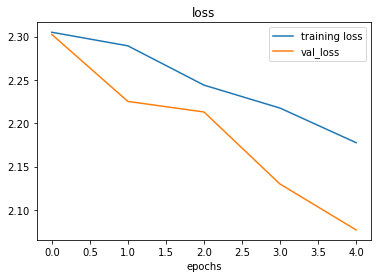

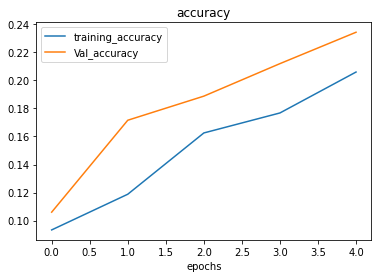

In [ ]:
# Check out our model trained on augumented data loss curves
plot_loss_curves(history_10)

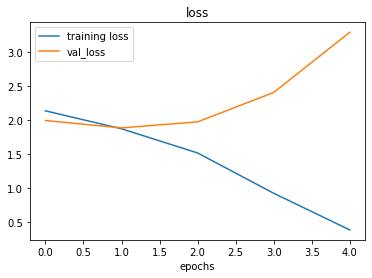

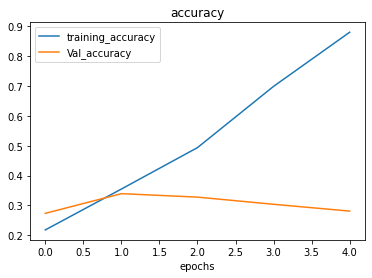

In [ ]:
 plot_loss_curves(history_8)

Woah! That looks much better, the loss curves are much closer toeach other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

--> Baselin ---> Upgrade ...

## 7. Repeat until satisified

We could keep going here... continually trying to bring our loss curves together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- Restructuring our model's architecture (increase layers/ hidden units)
- Adjust the learning rate
- Try different types of data augmentation (adjust the hyperparameter in our ImageDataGenerator insatnce.
- Training for longer (e.g. 10 epochs instead of 5 epochs)
- Try **transfer learning.**

### Making prediction with our model

Let's use our trained modelto make som predictions on our own custom images!

In [ ]:
# Remind ourselves of classes our model is tyrained on.
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'], dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg


--2022-10-12 13:45:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.01s   

2022-10-12 13:45:22 (277 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-10-12 13:45:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting resp

In [ ]:
# Reconfig pred and plot function to work wit multi-class images
def pred_and_plot(model, filename, class_names = class_names):
    """
    Import an image located at filename, makes a prediction with the model 
    and plots the image wit the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make prediction
    pred = model.predict(tf.expand_dims(img, axis = 0))[0]
    #print(pred)

    # Add in logic for multi-class & get pred_class name
    if len(pred) > 1:
        pred_class = class_names[tf.argmax(pred)]
    else:
        pred_class = class_names[int(tf.round(pred))]

    # plot the image and the predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class.capitalize()}")
    plt.axis(False);


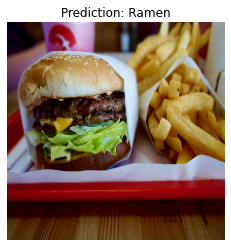

In [ ]:
# making prediction with model_10
pred_and_plot(model = model_10, 
              filename = "03-hamburger.jpeg",
              class_names = class_names)

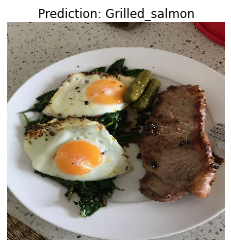

In [ ]:
# making prediction with model_10
pred_and_plot(model = model_10, 
              filename = "03-steak.jpeg",
              class_names = class_names)

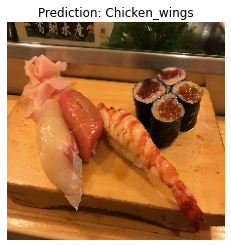

In [ ]:
# making prediction with model_10
pred_and_plot(model = model_10, 
              filename = "03-sushi.jpeg",
              class_names = class_names)

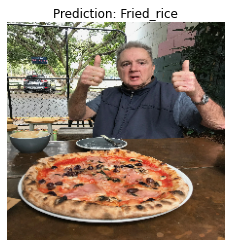

In [ ]:
# making prediction with model_10
pred_and_plot(model = model_10, 
              filename = "03-pizza-dad.jpeg",
              class_names = class_names)

Looks like our model didn't perform very well on our custom images but this is because it acheived only ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data. We will try to improve our model's performance using tensorflow.

### Saving and loading our model.

In [ ]:
# Save model
model_10.save("saved_trained_model_10")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")

# Compaire our loaded model to our existing model
loaded_model_10.evaluate(test_data) == model_10.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 2.0771 - accuracy: 0.2344


False

In [ ]:
# Save our best binary classification image model
model_7.save("Steak_Pizza_Recoginition")

In [ ]:
loaded_model_7 = tf.keras.models.load_model("Steak_Pizza_Recoginition")

In [ ]:
!wget https://bottomleftofthemitten.com/wp-content/uploads/2016/11/PepperSteakPizza_8xf12.jpg

--2022-10-12 13:46:01--  https://bottomleftofthemitten.com/wp-content/uploads/2016/11/PepperSteakPizza_8xf12.jpg
Resolving bottomleftofthemitten.com (bottomleftofthemitten.com)... 172.67.198.64, 104.21.36.178, 2606:4700:3035::ac43:c640, ...
Connecting to bottomleftofthemitten.com (bottomleftofthemitten.com)|172.67.198.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 542480 (530K) [image/jpeg]
Saving to: ‘PepperSteakPizza_8xf12.jpg’

PepperSteakPizza_8x 100%[===================>] 529.77K   824KB/s    in 0.6s    

2022-10-12 13:46:03 (824 KB/s) - ‘PepperSteakPizza_8xf12.jpg’ saved [542480/542480]



In [ ]:
!wget https://hips.hearstapps.com/amv-prod-tpw.s3.amazonaws.com/wp-content/uploads/2011/09/steakhousepizza1.jpg

--2022-10-12 13:46:03--  https://hips.hearstapps.com/amv-prod-tpw.s3.amazonaws.com/wp-content/uploads/2011/09/steakhousepizza1.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51395 (50K) [image/jpeg]
Saving to: ‘steakhousepizza1.jpg’

steakhousepizza1.jp 100%[===================>]  50.19K  --.-KB/s    in 0.001s  

2022-10-12 13:46:03 (36.6 MB/s) - ‘steakhousepizza1.jpg’ saved [51395/51395]



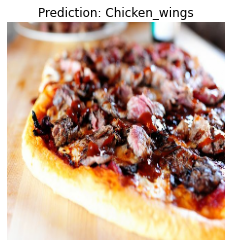

In [ ]:
# make prediction using model_10
pred_and_plot(model = model_7, 
              filename = "steakhousepizza1.jpg")

# **End**